In [1]:
import pandas as pd
import os
import numpy as np



In [4]:
folder = "results/"

files = os.listdir(folder)


In [35]:
def lst_to_df(lst, folder):
    """"Takes in list of model .csv files and
        retruns a df of the model hyperparemters, 
        max acc and min loss
        """
    df = pd.DataFrame(columns=['Model', 'Learning Rate', 'Weight Decay','Accuarcy', 'Loss'])
    
    for file in lst:

        acc = max(pd.read_csv(folder+file)["val_accuracy"])
        loss = min(pd.read_csv(folder+file)["val_loss"])

        model = file
        file = file[:-4]
        file_split = file.split("_")
        
        wd = file.split("_")[2][:-4]
        lr = file.split("_")[1]

        data = [model, lr, wd, acc, loss]


        df = pd.concat([df, pd.DataFrame([data], columns=df.columns)], ignore_index=True)

    return df

In [36]:
df = lst_to_df(files, folder)
df.sort_values(by="Accuarcy", ascending=False)

/var/folders/7p/skyzq__54w10q_m2tnsc0grh0000gn/T/ipykernel_19489/3198817025.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data], columns=df.columns)], ignore_index=True)


,Model,Learning Rate,Weight Decay,Accuarcy,Loss
6,ViT_1e-05_0.1.csv,1e-05,,0.910,0.356615
5,ViT_1e-05_0.04.csv,1e-05,,0.902,0.413905
4,ViT_1e-05_0.3.csv,1e-05,,0.900,0.408753
3,ViT_5e-05_0.04.csv,5e-05,,0.892,0.414236
0,ViT_5e-05_0.3.csv,5e-05,,0.888,0.462919
1,ViT_5e-05_0.1.csv,5e-05,,0.888,0.412616
7,ViT_1e-06_0.1.csv,1e-06,,0.822,3.330251
8,ViT_1e-06_0.3.csv,1e-06,,0.810,3.329751
2,ViT_1e-06_0.04.csv,1e-06,,0.808,3.336059


In [37]:
best = list(df["Model"])
best

['ViT_5e-05_0.3.csv',
 'ViT_5e-05_0.1.csv',
 'ViT_1e-06_0.04.csv',
 'ViT_5e-05_0.04.csv',
 'ViT_1e-05_0.3.csv',
 'ViT_1e-05_0.04.csv',
 'ViT_1e-05_0.1.csv',
 'ViT_1e-06_0.1.csv',
 'ViT_1e-06_0.3.csv']

In [6]:
files 

['ViT_5e-05_0.3.csv',
 'ViT_5e-05_0.1.csv',
 'ViT_1e-06_0.04.csv',
 'ViT_5e-05_0.04.csv',
 'ViT_1e-05_0.3.csv',
 'ViT_1e-05_0.04.csv',
 'ViT_1e-05_0.1.csv',
 'ViT_1e-06_0.1.csv',
 'ViT_1e-06_0.3.csv']

In [13]:
st = 'ViT_5e-05_0.04.csv'
st.split("_")[2][:-4]

'0.04'

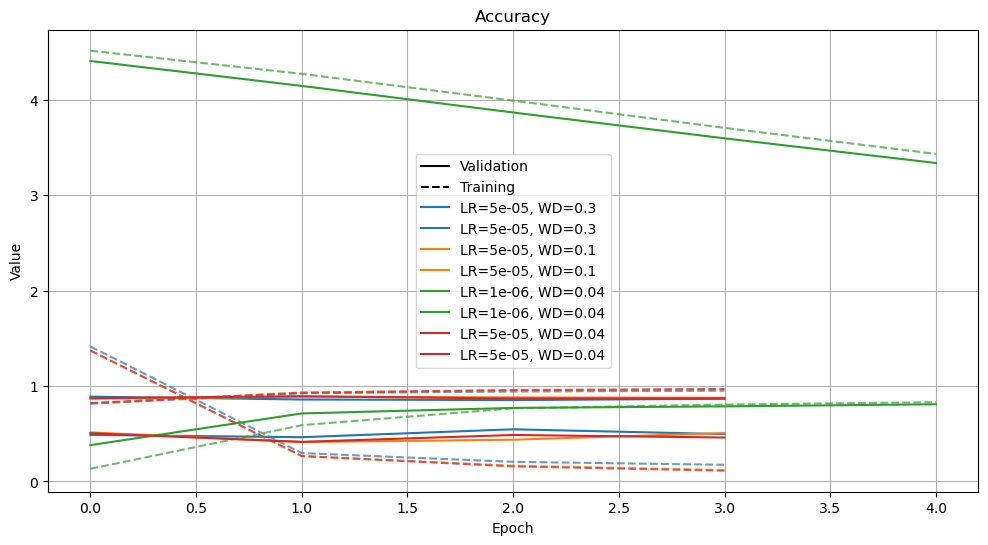

In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing the CSV files
directory = folder

# Regex pattern to extract learning rate and weight decay from filenames
pattern = re.compile(r"ViT_(\d*\.?\d*)_(\d*\.?\d*)\.csv")

# Initialize storage for plots
plt.figure(figsize=(12, 6))

colors = plt.cm.tab10.colors

color_idx = 0
handles = []
labels = []

first_plot = True

# Loop through files in the directory
for file in best[:4]:
    # match = pattern.match(file)
    # if match:
    #     lr, wd = match.groups()
    #     lr, wd = float(lr), float(wd)  # Convert to float

    # Read CSV file
    df = pd.read_csv(os.path.join(directory, file))

    wd = file.split("_")[2][:-4]
    lr = file.split("_")[1]

    model_color = colors[color_idx % len(colors)]
    color_idx += 1

    
    # Check if required columns exist
    if "val_loss" in df.columns and "val_accuracy" in df.columns:
        plt.plot(df["val_loss"], label=f"LR={lr}, WD={wd}",  color=model_color)
        plt.plot(df["loss"], linestyle="--", alpha=0.7,  color=model_color)
        plt.plot(df["val_accuracy"], label=f"LR={lr}, WD={wd}",  color=model_color)
        plt.plot(df["accuracy"], linestyle="--", alpha=0.7,  color=model_color)

        if first_plot:
                handles.append(plt.Line2D([0], [0], linestyle="-", color="black"))
                labels.append("Validation")
                handles.append(plt.Line2D([0], [0], linestyle="--", color="black"))
                labels.append("Training")
                first_plot = False

# Configure plot
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Accuracy")
plt.legend(handles=handles + plt.gca().get_legend_handles_labels()[0], 
           labels=labels + plt.gca().get_legend_handles_labels()[1])
#plt.legend()
plt.grid()
plt.show()


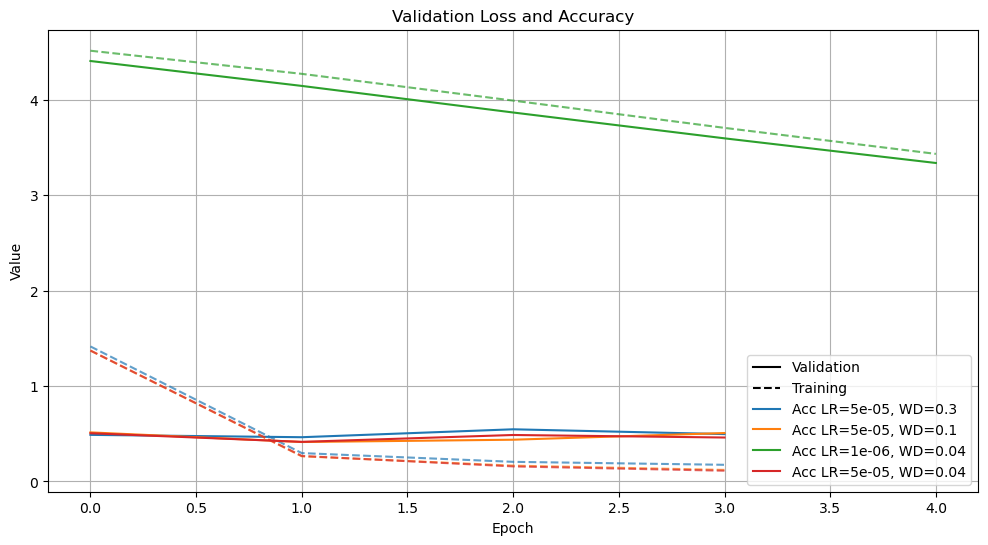

In [51]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing the CSV files
directory = folder

# Regex pattern to extract learning rate and weight decay from filenames
pattern = re.compile(r"ViT_(\d*\.?\d*)_(\d*\.?\d*)\.csv")

# Initialize storage for plots
plt.figure(figsize=(12, 6))

colors = plt.cm.tab10.colors

color_idx = 0
handles = []
labels = []

first_plot = True

# Loop through files in the directory
for file in best[:4]:
    # match = pattern.match(file)
    # if match:
    #     lr, wd = match.groups()
    #     lr, wd = float(lr), float(wd)  # Convert to float

    # Read CSV file
    df = pd.read_csv(os.path.join(directory, file))

    wd = file.split("_")[2][:-4]
    lr = file.split("_")[1]

    model_color = colors[color_idx % len(colors)]
    color_idx += 1
    
    # Check if required columns exist
    if "val_loss" in df.columns and "val_accuracy" in df.columns:
       # plt.plot(df["val_loss"], label=f"Loss LR={lr}, WD={wd}")
        plt.plot(df["val_loss"], label=f"Acc LR={lr}, WD={wd}",  color=model_color)
        plt.plot(df["loss"], linestyle="--", alpha=0.7,  color=model_color)
        if first_plot:
                    handles.append(plt.Line2D([0], [0], linestyle="-", color="black"))
                    labels.append("Validation")
                    handles.append(plt.Line2D([0], [0], linestyle="--", color="black"))
                    labels.append("Training")
                    first_plot = False

# Configure plot
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Validation Loss and Accuracy")
plt.legend(handles=handles + plt.gca().get_legend_handles_labels()[0], 
           labels=labels + plt.gca().get_legend_handles_labels()[1])
#plt.legend()
plt.grid()
plt.show()

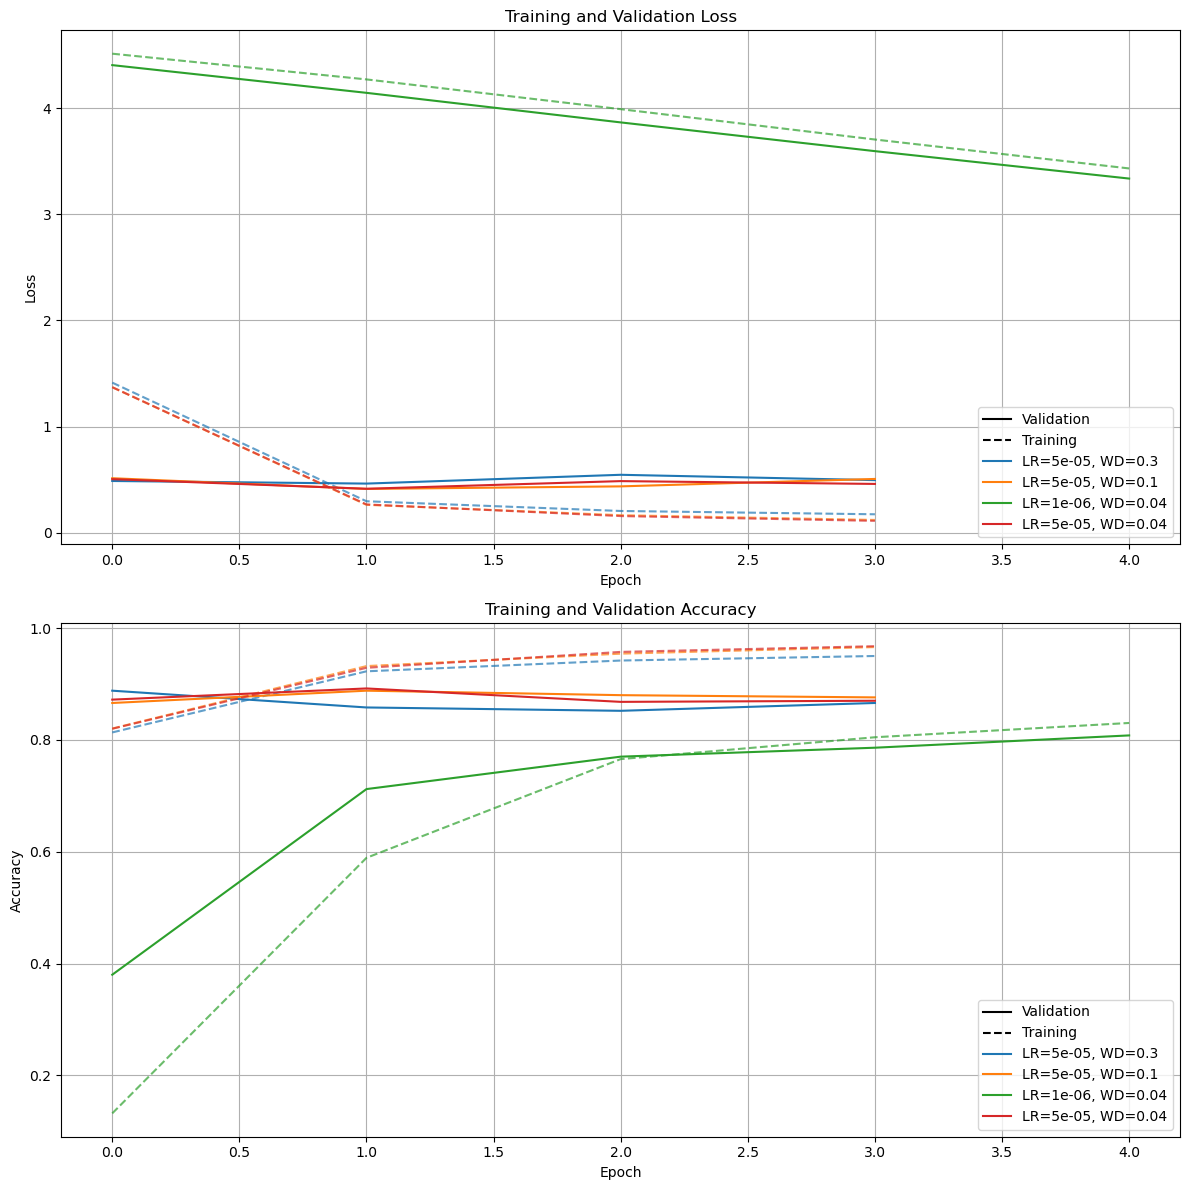

In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

# Directory containing the CSV files
directory = folder

# Regex pattern to extract learning rate and weight decay from filenames
pattern = re.compile(r"ViT_(\d*\.?\d*)_(\d*\.?\d*)\.csv")

# Initialize the subplots (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

colors = plt.cm.tab10.colors
color_idx = 0
handles = []
labels = []

first_plot = True

# Loop through files in the directory
for file in best[:4]:
    # Read CSV file
    df = pd.read_csv(os.path.join(directory, file))

    wd = file.split("_")[2][:-4]
    lr = file.split("_")[1]

    model_color = colors[color_idx % len(colors)]
    color_idx += 1

    # Check if required columns exist
    if "val_loss" in df.columns and "val_accuracy" in df.columns:
        # Plot Loss on the first subplot (ax1)
        ax1.plot(df["val_loss"], label=f"LR={lr}, WD={wd}", color=model_color)
        ax1.plot(df["loss"], linestyle="--", alpha=0.7, color=model_color)
        
        # Plot Accuracy on the second subplot (ax2)
        ax2.plot(df["val_accuracy"], label=f"LR={lr}, WD={wd}", color=model_color)
        ax2.plot(df["accuracy"], linestyle="--", alpha=0.7, color=model_color)

        if first_plot:
            handles.append(plt.Line2D([0], [0], linestyle="-", color="black"))
            labels.append("Validation")
            handles.append(plt.Line2D([0], [0], linestyle="--", color="black"))
            labels.append("Training")
            first_plot = False

# Configure Loss plot (ax1)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Training and Validation Loss")
ax1.legend(handles=handles + ax1.get_legend_handles_labels()[0], 
           labels=labels + ax1.get_legend_handles_labels()[1])
ax1.grid()

# Configure Accuracy plot (ax2)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Training and Validation Accuracy")
ax2.legend(handles=handles + ax2.get_legend_handles_labels()[0], 
           labels=labels + ax2.get_legend_handles_labels()[1])
ax2.grid()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


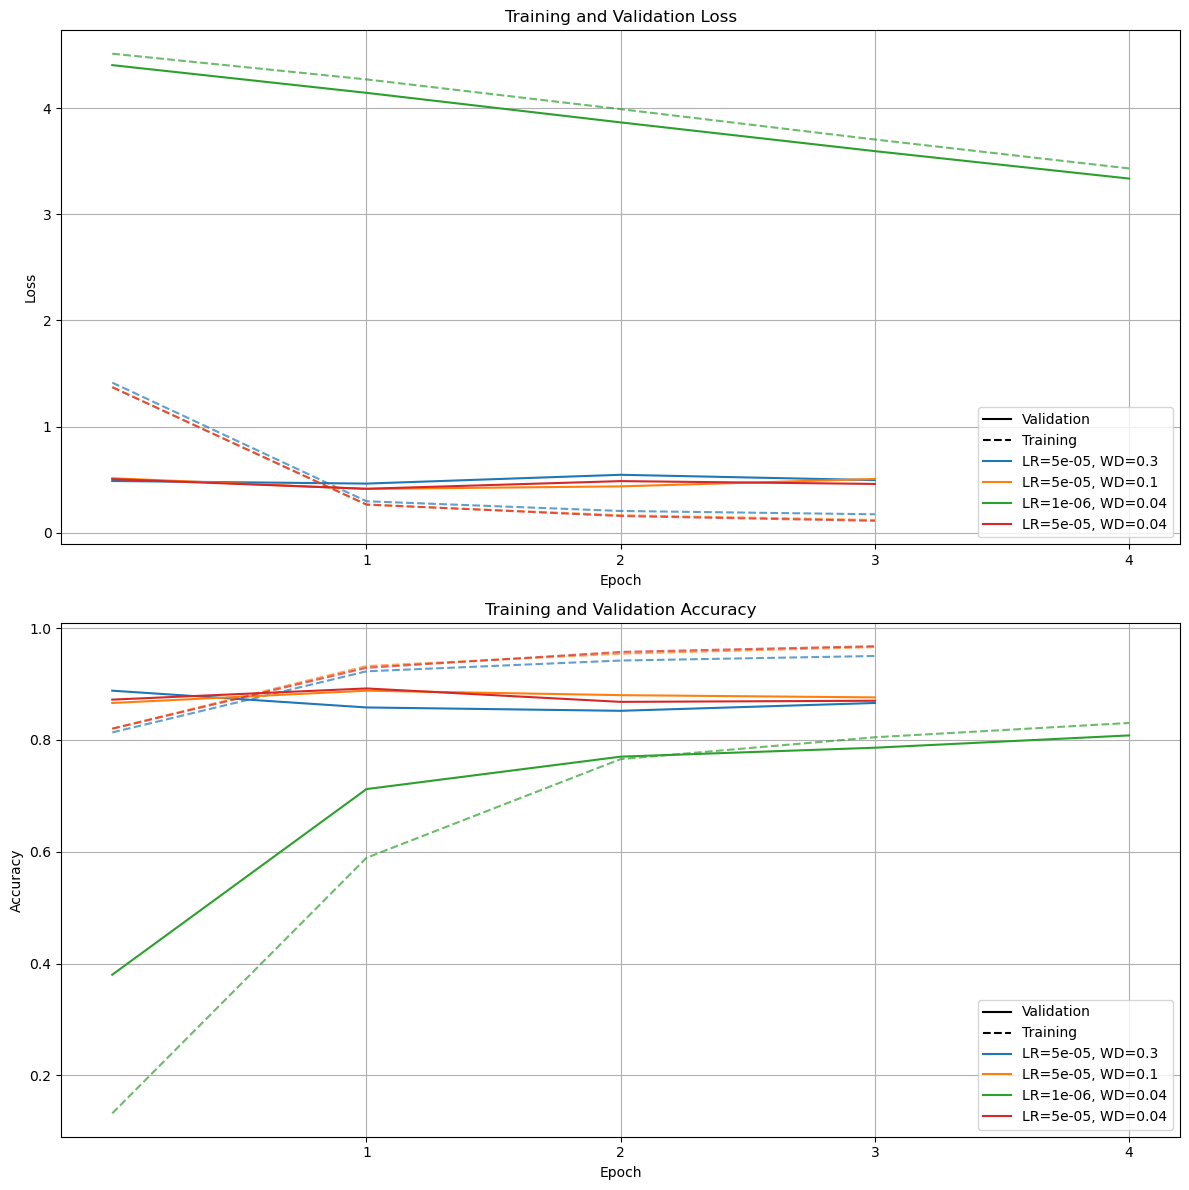

In [56]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

# Directory containing the CSV files
directory = folder

# Regex pattern to extract learning rate and weight decay from filenames
pattern = re.compile(r"ViT_(\d*\.?\d*)_(\d*\.?\d*)\.csv")

# Initialize the subplots (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

colors = plt.cm.tab10.colors
color_idx = 0
handles = []
labels = []

first_plot = True

# Loop through files in the directory
for file in best[:4]:
    # Read CSV file
    df = pd.read_csv(os.path.join(directory, file))

    wd = file.split("_")[2][:-4]
    lr = file.split("_")[1]

    model_color = colors[color_idx % len(colors)]
    color_idx += 1

    # Check if required columns exist
    if "val_loss" in df.columns and "val_accuracy" in df.columns:
        # Plot Loss on the first subplot (ax1)
        ax1.plot(df["val_loss"], label=f"LR={lr}, WD={wd}", color=model_color)
        ax1.plot(df["loss"], linestyle="--", alpha=0.7, color=model_color)
        
        # Plot Accuracy on the second subplot (ax2)
        ax2.plot(df["val_accuracy"], label=f"LR={lr}, WD={wd}", color=model_color)
        ax2.plot(df["accuracy"], linestyle="--", alpha=0.7, color=model_color)

        if first_plot:
            handles.append(plt.Line2D([0], [0], linestyle="-", color="black"))
            labels.append("Validation")
            handles.append(plt.Line2D([0], [0], linestyle="--", color="black"))
            labels.append("Training")
            first_plot = False

# Configure Loss plot (ax1)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Training and Validation Loss")
ax1.legend(handles=handles + ax1.get_legend_handles_labels()[0], 
           labels=labels + ax1.get_legend_handles_labels()[1])
ax1.grid()
ax1.set_xticks(range(1, len(df) + 1))  # Set x-ticks to start from 1

# Configure Accuracy plot (ax2)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Training and Validation Accuracy")
ax2.legend(handles=handles + ax2.get_legend_handles_labels()[0], 
           labels=labels + ax2.get_legend_handles_labels()[1])
ax2.grid()
ax2.set_xticks(range(1, len(df) + 1))  # Set x-ticks to start from 1

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [57]:
range(1, len(df) + 1)

range(1, 5)

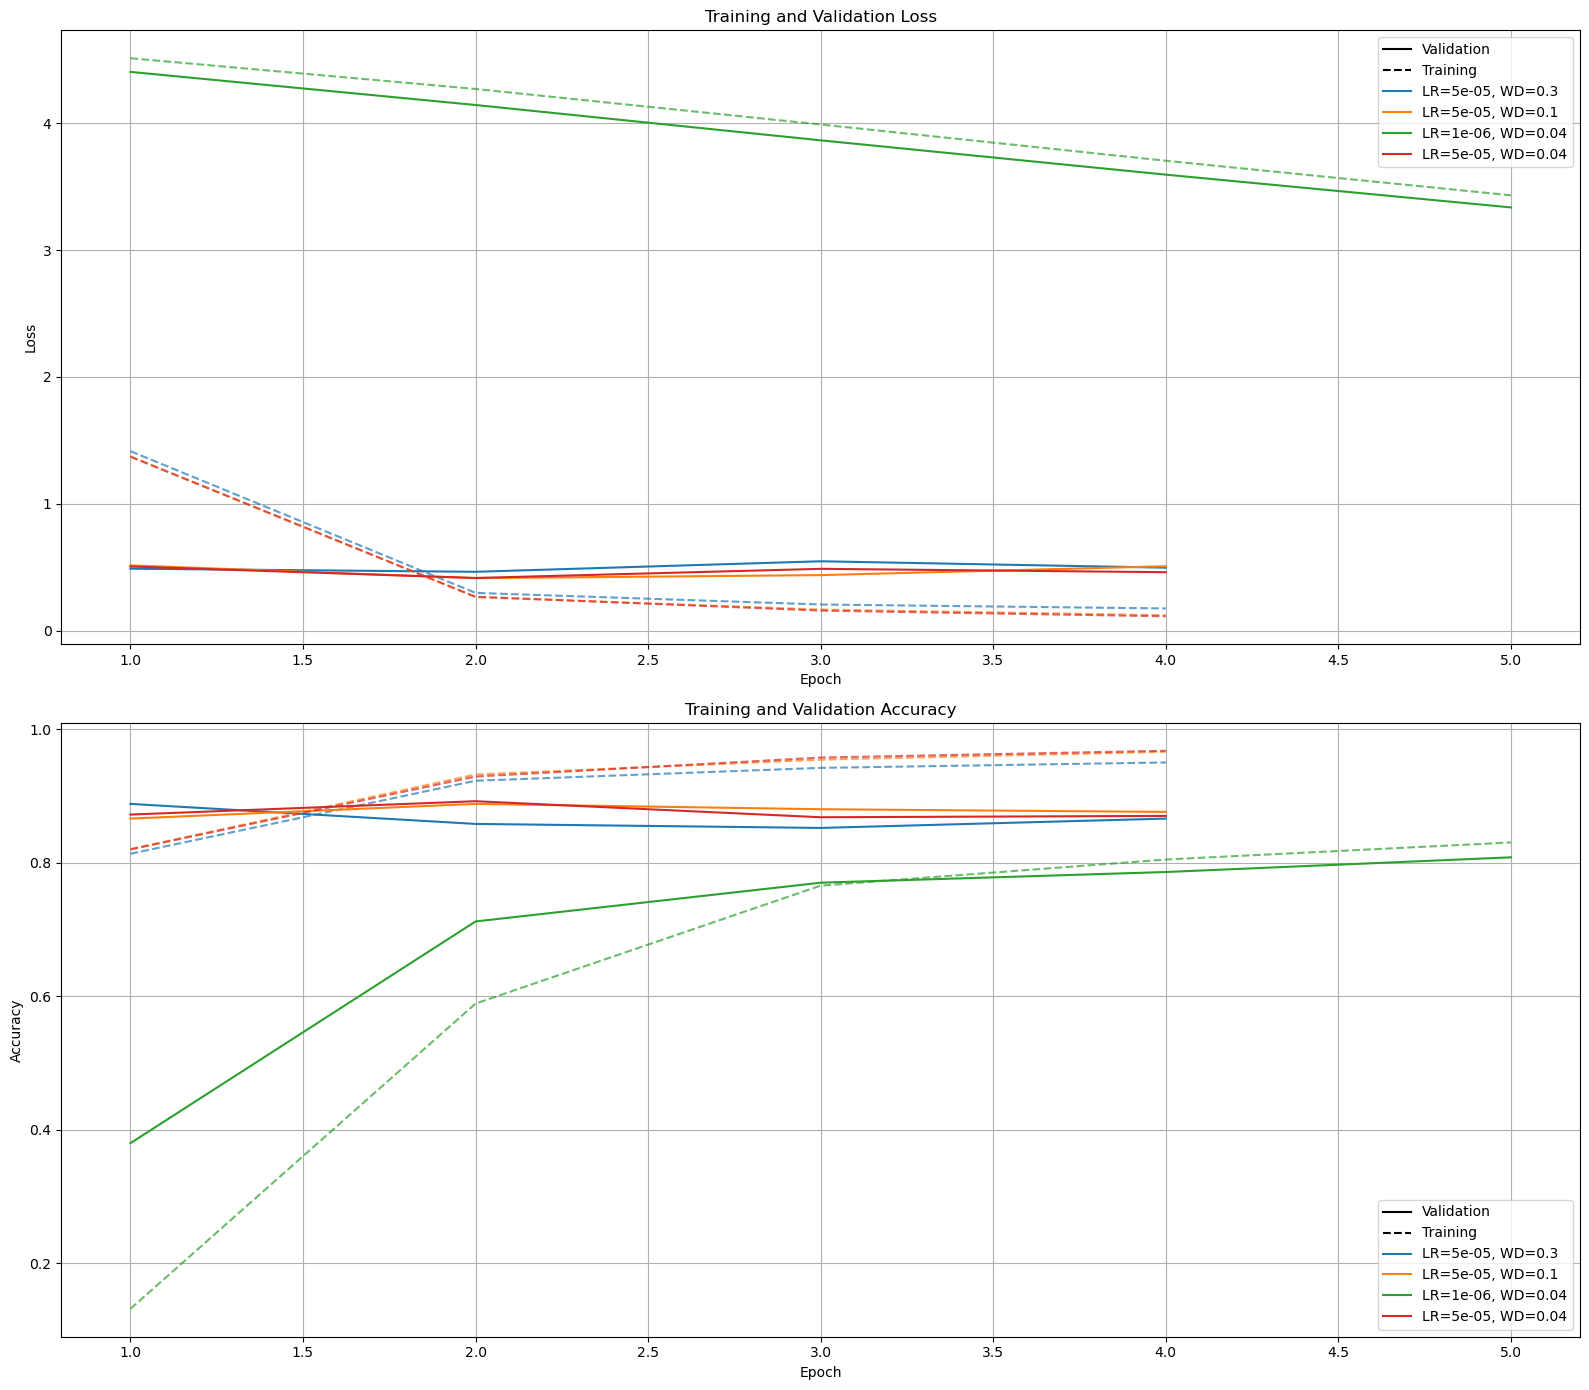

In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

# Directory containing the CSV files
directory = folder

# Regex pattern to extract learning rate and weight decay from filenames
pattern = re.compile(r"ViT_(\d*\.?\d*)_(\d*\.?\d*)\.csv")

# Initialize the subplots (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14))

colors = plt.cm.tab10.colors
color_idx = 0
handles = []
labels = []

first_plot = True

# Loop through files in the directory
for file in best[:4]:
    # Read CSV file
    df = pd.read_csv(os.path.join(directory, file))

    wd = file.split("_")[2][:-4]
    lr = file.split("_")[1]

    model_color = colors[color_idx % len(colors)]
    color_idx += 1

    # Shift the data by one (make the x-axis start at 1)
    shifted_epoch = range(1, len(df) + 1)  # Epochs start from 1
    shifted_val_loss = df["val_loss"].values
    shifted_loss = df["loss"].values
    shifted_val_accuracy = df["val_accuracy"].values
    shifted_accuracy = df["accuracy"].values

    # Check if required columns exist
    if "val_loss" in df.columns and "val_accuracy" in df.columns:
        # Plot Loss on the first subplot (ax1)
        ax1.plot(shifted_epoch, shifted_val_loss, label=f"LR={lr}, WD={wd}", color=model_color)
        ax1.plot(shifted_epoch, shifted_loss, linestyle="--", alpha=0.7, color=model_color)
        
        # Plot Accuracy on the second subplot (ax2)
        ax2.plot(shifted_epoch, shifted_val_accuracy, label=f"LR={lr}, WD={wd}", color=model_color)
        ax2.plot(shifted_epoch, shifted_accuracy, linestyle="--", alpha=0.7, color=model_color)

        if first_plot:
            handles.append(plt.Line2D([0], [0], linestyle="-", color="black"))
            labels.append("Validation")
            handles.append(plt.Line2D([0], [0], linestyle="--", color="black"))
            labels.append("Training")
            first_plot = False

# Configure Loss plot (ax1)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Training and Validation Loss")
ax1.legend(handles=handles + ax1.get_legend_handles_labels()[0], 
           labels=labels + ax1.get_legend_handles_labels()[1])
ax1.grid()

# Configure Accuracy plot (ax2)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Training and Validation Accuracy")
ax2.legend(handles=handles + ax2.get_legend_handles_labels()[0], 
           labels=labels + ax2.get_legend_handles_labels()[1])
ax2.grid()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots

fig.savefig(f'training_history_lr_ViT.png', dpi=300, bbox_inches='tight')
# plt.figure(fig.number)
plt.show()

